In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
Glass = pd.read_csv("C:\\Users\\siddh\\Downloads\\glass.csv")
Glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
Glass.shape

(214, 10)

In [9]:
Glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
# There are no Null values in the given Data Set.

In [10]:
Glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [16]:
dups = Glass.duplicated()
print('Number of Duplicate Rows: %d' % dups.sum())

Number of Duplicate Rows: 0


In [15]:
print('Rows before Removing Duplicates = %d' % Glass.shape[0])

Glass = Glass.drop_duplicates()
print('Rows after Removing Duplicates = %d' % Glass.shape[0])

Rows before Removing Duplicates = 213
Rows after Removing Duplicates = 213


In [20]:
Glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [21]:
Glass['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

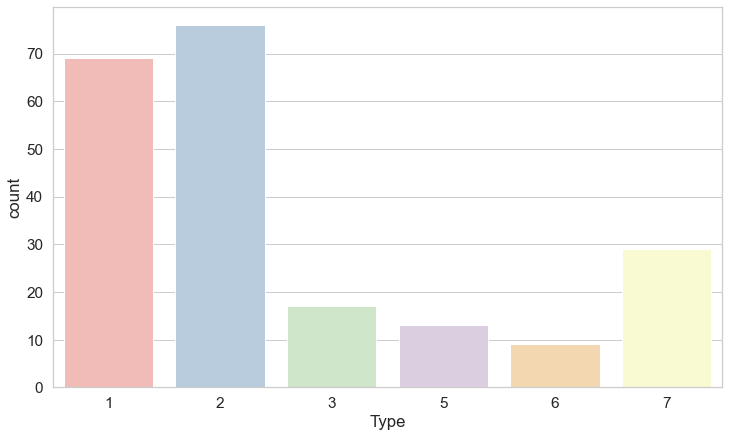

In [23]:
sns.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sns.countplot(x = 'Type', data = Glass, palette = 'Pastel1')

In [24]:
# Type 1 and Type 2 are most frequent.

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RI'>

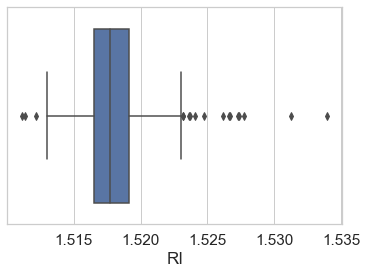

In [26]:
# Data Visualization by Boxplot.
# We'll also check the outliers for different variables.
sns.boxplot(Glass['RI'])

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Na'>

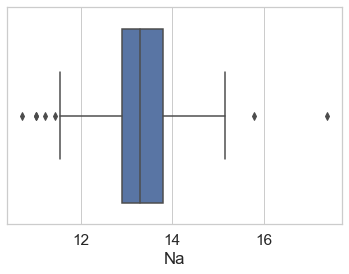

In [27]:
sns.boxplot(Glass['Na'])

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mg'>

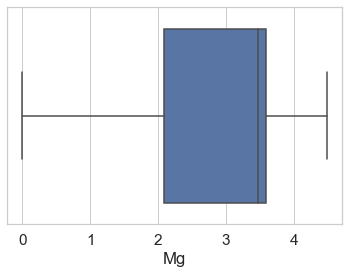

In [28]:
sns.boxplot(Glass['Mg'])

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Al'>

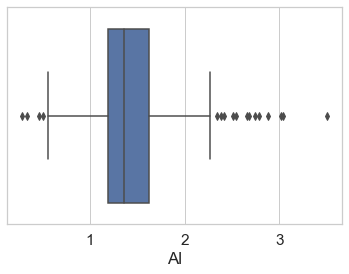

In [29]:
sns.boxplot(Glass['Al'])

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Si'>

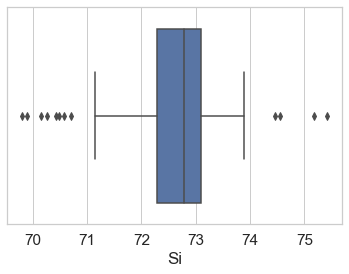

In [30]:
sns.boxplot(Glass['Si'])

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='K'>

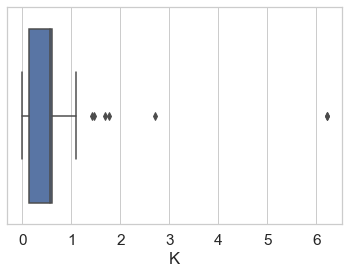

In [32]:
sns.boxplot(Glass['K'])

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ca'>

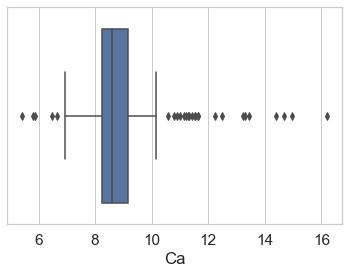

In [35]:
sns.boxplot(Glass['Ca'])

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ba'>

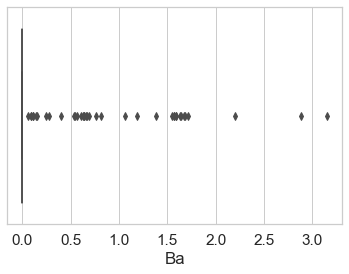

In [36]:
sns.boxplot(Glass['Ba'])

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fe'>

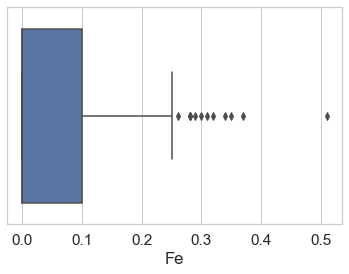

In [37]:
sns.boxplot(Glass['Fe'])

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type'>

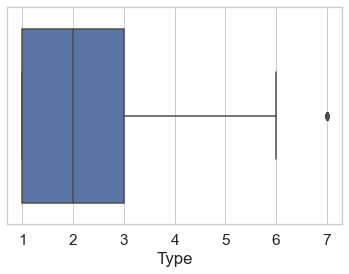

In [38]:
sns.boxplot(Glass['Type'])

In [39]:
# Except "Mg" all the variables have outliers.

In [40]:
# Now we'll use Heat Map to check the missing values and correlation between features.

# HEAT-MAP

<AxesSubplot:>

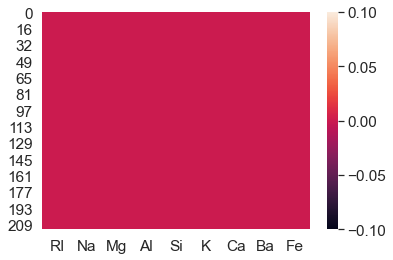

In [41]:
Y = 'Type'
X = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

sns.heatmap(Glass[X].isnull())

In [42]:
# As there is no color other than red so there are no Missing Values.

<AxesSubplot:>

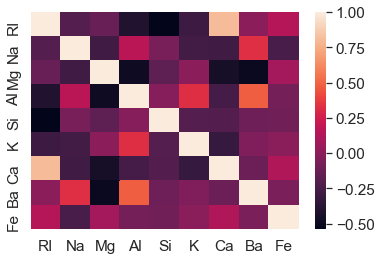

In [45]:
sns.heatmap(Glass[X].corr())

In [46]:
Glass[X].corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000


In [47]:
# Train and Test
X = pd.DataFrame(Glass.drop(["Type"], axis = 1),
            columns=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'])
Y = Glass.Type

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 30, stratify = Y)

In [48]:
X_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
145,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35
14,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00
178,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.00,0.00
53,1.51837,13.14,2.84,1.28,72.85,0.55,9.07,0.00,0.00
49,1.51898,13.58,3.35,1.23,72.08,0.59,8.91,0.00,0.00
...,...,...,...,...,...,...,...,...,...
75,1.51590,13.02,3.58,1.51,73.12,0.69,7.96,0.00,0.00
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.00,0.09
32,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22


In [49]:
Y_train

145    2
14     1
178    6
53     1
49     1
      ..
75     2
197    7
159    3
32     1
204    7
Name: Type, Length: 170, dtype: int64

In [50]:
X_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.00,0.00
42,1.51779,13.21,3.39,1.33,72.76,0.59,8.59,0.00,0.00
89,1.51640,12.55,3.48,1.87,73.23,0.63,8.08,0.00,0.09
37,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.00,0.00
81,1.51593,13.25,3.45,1.43,73.17,0.61,7.86,0.00,0.00
193,1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08
60,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.00,0.00
128,1.52068,13.55,2.09,1.67,72.18,0.53,9.57,0.27,0.17
188,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.00,0.00


In [52]:
Y_test

179    6
42     1
89     2
37     1
81     2
193    7
60     1
128    2
188    7
155    3
7      1
189    7
198    7
153    3
99     2
47     1
175    5
12     1
3      1
87     2
79     2
2      1
69     1
184    6
98     2
101    2
93     2
80     2
115    2
140    2
148    3
125    2
169    5
168    5
46     1
23     1
54     1
17     1
114    2
67     1
118    2
210    7
192    7
Name: Type, dtype: int64

In [54]:
# Grid-Search
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [55]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X_train, Y_train)
print(grid.best_params_)

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


{'n_neighbors': 1}


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\siddh\anaconda3\lib\site-packag

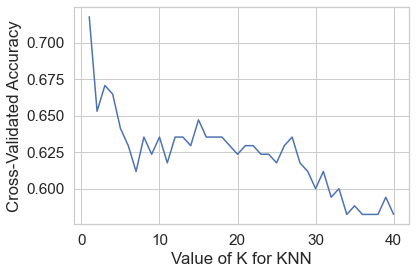

In [57]:
# CROSS-VALIDATION Analysis
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [58]:
# Prediction using KNN Classifier
model = KNeighborsClassifier(n_neighbors =1).fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

0.7441860465116279


In [59]:
# Confusion Matrix to double check
confusion_matrix = confusion_matrix(Y_test,y_pred)
print (confusion_matrix)

[[ 9  1  4  0  0  0]
 [ 2 13  0  0  0  0]
 [ 2  0  1  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  1  4]]


In [60]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      0.64      0.67        14
           2       0.87      0.87      0.87        15
           3       0.20      0.33      0.25         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         6

    accuracy                           0.74        43
   macro avg       0.74      0.75      0.73        43
weighted avg       0.78      0.74      0.76        43



In [61]:
# For TYPE-3 precision, recall and F1-Score is less.
# We'll use oversampling as the data is less.

In [62]:
## We'll use Synthetic Minority Oversampling Technique (SMOTE)
#Using SMOTE
sm = SMOTE(sampling_strategy = 'not majority', random_state = 42)

In [65]:
x_resample, y_resample = sm.fit_resample(X, Y)
y_df = pd.DataFrame(y_resample)

In [66]:
y_df.value_counts()

Type
7       76
6       76
5       76
3       76
2       76
1       76
dtype: int64

In [67]:
# After Re-sampling the values got changed to 76.
# Next we'll have to build a KNN Model

In [68]:
# In order to make the data scale free and unitless we'll have to0 use standardization Technique

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(x_resample, y_resample, test_size = .2, random_state = 40, stratify = y_resample)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [70]:
# Grid-Search

n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X_train, Y_train)
print(grid.best_params_)

{'n_neighbors': 1}


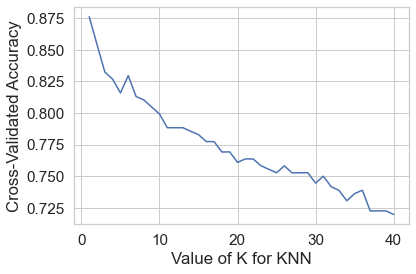

In [72]:
# Accuracy w.r.t K-Values
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10)
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [73]:
# From the above we saw that Cross-Validated Accuracy decreases as the K-Value Increases

In [74]:
# KNN-Model (k=1)
model = KNeighborsClassifier(n_neighbors =1).fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

0.8913043478260869


In [76]:
# We got the accuracy 89%.
# Let's Double check it with Confusion Matrix

In [77]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,y_pred)
confusion_matrix

array([[12,  0,  4,  0,  0,  0],
       [ 3, 10,  1,  1,  0,  0],
       [ 0,  0, 15,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0, 15,  0],
       [ 0,  0,  0,  1,  0, 14]], dtype=int64)

In [79]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       0.80      0.75      0.77        16
           2       1.00      0.67      0.80        15
           3       0.75      1.00      0.86        15
           5       0.89      1.00      0.94        16
           6       1.00      1.00      1.00        15
           7       1.00      0.93      0.97        15

    accuracy                           0.89        92
   macro avg       0.91      0.89      0.89        92
weighted avg       0.91      0.89      0.89        92



In [80]:
# Precision and Recall values are more than 0.75

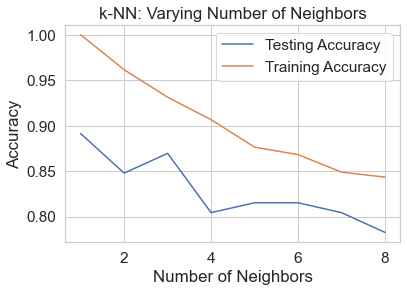

In [81]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    model = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    model.fit(X_train,Y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = model.score(X_train, Y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = model.score(X_test, Y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()